In [ ]:
'''This project aims to predict customer churn in a telecom company using machine learning models.The dataset contains various customer attributes 
such as demographics, service usage patterns, contract details, and billing information. By analyzing these factors, we build classification models to
identify customers who are likely to leave the service. This helps the business take proactive steps to improve customer retention and reduce revenue 
loss.

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

import pandas as pd
import numpy as np
import re

In [4]:
given_df = pd.read_csv('D:\Data Science\Machine Learning\project_churn\churn_Dataset.csv')

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\kasub\AppData\Local\Temp\ipykernel_10060\3011851226.py:1: SyntaxWarning: invalid escape sequence '\D'
  given_df = pd.read_csv('D:\Data Science\Machine Learning\project_churn\churn_Dataset.csv')


In [6]:
given_df                                                                       #Impoerting my Data-Frame from local disk.

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [8]:
given_df.drop(['customerID'],axis=1,inplace=True)

    -> Here giving customer-ID to train my model makes no sense as the customer ID will be unique for each and every person i.e Useless column. Hence droped the column.

In [11]:
given_df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [13]:
given_df.dtypes       # Checking Data types of my columns.

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

# Data Pre-Processing 

## Checking for missing Values

In [17]:
given_df.gender.value_counts()            
given_df.gender.value_counts().sum()

gender
Male      3555
Female    3488
Name: count, dtype: int64

7043

In [19]:
given_df.SeniorCitizen.value_counts()
given_df.SeniorCitizen.value_counts().sum()

SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

7043

In [21]:
given_df.Partner.value_counts()
given_df.Partner.value_counts().sum()

Partner
No     3641
Yes    3402
Name: count, dtype: int64

7043

In [23]:
given_df.Dependents.value_counts()
given_df.Dependents.value_counts().sum()

Dependents
No     4933
Yes    2110
Name: count, dtype: int64

7043

In [25]:
given_df.tenure.value_counts()
given_df.tenure.value_counts().sum()

tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64

7043

In [27]:
given_df.PhoneService.value_counts()
given_df.PhoneService.value_counts().sum()

PhoneService
Yes    6361
No      682
Name: count, dtype: int64

7043

In [29]:
given_df.MultipleLines.value_counts()
given_df.MultipleLines.value_counts().sum()

MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

7043

In [31]:
given_df['MultipleLines'] = given_df['MultipleLines'].replace(['No phone service'],'No')  

One Word Substitution of my variables Which mean same thing here acoording to my Column.

In [34]:
given_df.MultipleLines.value_counts()
given_df.MultipleLines.value_counts().sum()

MultipleLines
No     4072
Yes    2971
Name: count, dtype: int64

7043

In [36]:
given_df.InternetService.value_counts()
given_df.InternetService.value_counts().sum()

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

7043

In [38]:
given_df.OnlineSecurity.value_counts()
given_df.OnlineSecurity.value_counts().sum()

OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64

7043

In [40]:
given_df['OnlineSecurity'] = given_df['OnlineSecurity'].replace(['No internet service'],'No')

One Word Substitution of my variables Which mean same thing here acoording to my Column.

In [43]:
given_df.OnlineSecurity.value_counts()
given_df.OnlineSecurity.value_counts().sum()

OnlineSecurity
No     5024
Yes    2019
Name: count, dtype: int64

7043

In [45]:
given_df.OnlineBackup.value_counts()
given_df.OnlineBackup.value_counts().sum()

OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64

7043

In [47]:
given_df['OnlineBackup'] = given_df['OnlineBackup'].replace(['No internet service'],'No')

One Word Substitution of my variables Which mean same thing here acoording to my Column.

In [50]:
given_df.OnlineBackup.value_counts()
given_df.OnlineBackup.value_counts().sum()

OnlineBackup
No     4614
Yes    2429
Name: count, dtype: int64

7043

In [52]:
given_df.DeviceProtection.value_counts()
given_df.DeviceProtection.value_counts().sum()

DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64

7043

One Word Substitution of my variables Which mean same thing here acoording to my Column.

In [55]:
given_df['DeviceProtection'] = given_df['DeviceProtection'].replace(['No internet service'],'No')

In [57]:
given_df.DeviceProtection.value_counts()
given_df.DeviceProtection.value_counts().sum()

DeviceProtection
No     4621
Yes    2422
Name: count, dtype: int64

7043

In [59]:
given_df.TechSupport.value_counts()
given_df.TechSupport.value_counts().sum()

TechSupport
No                     3473
Yes                    2044
No internet service    1526
Name: count, dtype: int64

7043

One Word Substitution of my variables Which mean same thing here acoording to my Column.

In [62]:
given_df['TechSupport'] = given_df['TechSupport'].replace(['No internet service'],'No')

In [64]:
given_df.TechSupport.value_counts()
given_df.TechSupport.value_counts().sum()

TechSupport
No     4999
Yes    2044
Name: count, dtype: int64

7043

In [66]:
given_df.StreamingTV.value_counts()
given_df.StreamingTV.value_counts().sum()

StreamingTV
No                     2810
Yes                    2707
No internet service    1526
Name: count, dtype: int64

7043

One Word Substitution of my variables Which mean same thing here acoording to my Column.

In [69]:
given_df['StreamingTV'] = given_df['StreamingTV'].replace(['No internet service'],'No')

In [71]:
given_df.StreamingTV.value_counts()
given_df.StreamingTV.value_counts().sum()

StreamingTV
No     4336
Yes    2707
Name: count, dtype: int64

7043

In [73]:
given_df.StreamingMovies.value_counts()
given_df.StreamingMovies.value_counts().sum()

StreamingMovies
No                     2785
Yes                    2732
No internet service    1526
Name: count, dtype: int64

7043

One Word Substitution of my variables Which mean same thing here acoording to my Column.

In [76]:
given_df['StreamingMovies'] = given_df['StreamingMovies'].replace(['No internet service'],'No')

In [78]:
given_df.StreamingMovies.value_counts()
given_df.StreamingMovies.value_counts().sum()

StreamingMovies
No     4311
Yes    2732
Name: count, dtype: int64

7043

In [80]:
given_df.Contract.value_counts()
given_df.Contract.value_counts().sum()

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

7043

In [82]:
given_df.PaperlessBilling.value_counts()
given_df.PaperlessBilling.value_counts().sum()

PaperlessBilling
Yes    4171
No     2872
Name: count, dtype: int64

7043

In [84]:
given_df.PaymentMethod.value_counts()
given_df.PaymentMethod.value_counts().sum()

PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64

7043

In [86]:
given_df.MonthlyCharges.value_counts()
given_df.MonthlyCharges.value_counts().sum()

MonthlyCharges
20.05     61
19.85     45
19.95     44
19.90     44
20.00     43
          ..
23.65      1
114.70     1
43.65      1
87.80      1
78.70      1
Name: count, Length: 1585, dtype: int64

7043

In [88]:
given_df.TotalCharges.value_counts(dropna=False)                               # Identified Null\blank\Voids
given_df.TotalCharges.value_counts().sum()

TotalCharges
          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: count, Length: 6531, dtype: int64

7043

In [90]:
given_df.Churn.value_counts()
given_df.Churn.value_counts().sum()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

7043

## Replacing Null \ Blanks \ Voids with NaN


In [93]:
voidspace_index = []
for i in given_df[given_df['TotalCharges'] == ' '].index:
    voidspace_index.append(int(i))

In [95]:
voidspace_index

[488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754]

In [97]:
#given_df = given_df.drop(voidspace_index)                                      (As dropping is not always possible)

In [99]:
given_df.TotalCharges.value_counts()
given_df.TotalCharges.value_counts().sum()

TotalCharges
          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: count, Length: 6531, dtype: int64

7043

In [101]:
final_TC = pd.DataFrame(given_df['TotalCharges'].replace(' ',np.nan))           #Replacing Null\voids\blanks with NaN
final_TC

,TotalCharges
0,29.85
1,1889.5
2,108.15
3,1840.75
4,151.65
...,...
7038,1990.5
7039,7362.9
7040,346.45
7041,306.6


In [103]:
final_TC.value_counts(dropna=False)                                            #Checking for NaN values 

TotalCharges
NaN             11
20.2            11
19.75            9
20.05            8
19.9             8
                ..
2602.9           1
260.8            1
260.7            1
2599.95          1
381.2            1
Name: count, Length: 6531, dtype: int64

## One Hot Encoding

In [115]:
pip install --upgrade scikit-learn

   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB 1.3 MB/s eta 0:00:09
   ---------------------------------------- 0.1/11.1 MB 1.3 MB/s eta 0:00:09
    --------------------------------------- 0.2/11.1 MB 2.1 MB/s eta 0:00:06
   - -------------------------------------- 0.5/11.1 MB 3.1 MB/s eta 0:00:04
   -- ------------------------------------- 0.7/11.1 MB 3.2 MB/s eta 0:00:04
   ---- ----------------------------------- 1.1/11.1 MB 4.4 MB/s eta 0:00:03
   ------- -------------------------------- 2.1/11.1 MB 7.1 MB/s eta 0:00:02
   ----------- ---------------------------- 3.2/11.1 MB 9.0 MB/s eta 0:00:01
   --------------- ------------------------ 4.2/11.1 MB 11.2 MB/s eta 0:00:01
   ----------------- ---------------------- 5.0/11.1 MB 10.9 MB/s eta 0:00:01
   ---------------------- ----------------- 6.3/11.1 MB 13.0 MB/s eta 0:00:01
   ------------------------ --------------- 6.9/11.1 MB 12.9 MB/s eta 0:00:01
  

  You can safely remove it manually.


In [117]:
from sklearn.preprocessing import OneHotEncoder                               
oe = OneHotEncoder(drop='first', sparse=False)

TypeError: OneHotEncoder.__init__() got an unexpected keyword argument 'sparse'

In [ ]:
#Dividing my Data Frame to  perform One Hot Encoding to Catogorical Columns.        
given_df_obj = given_df[['gender', 'Partner', 'Dependents','tenure',          # Data Frame with only Catagorical Values for One Hot Encoding
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod','Churn']] 

given_df_obj_oe = pd.DataFrame(oe.fit_transform(given_df_obj), index=given_df_obj.index,\
            columns=oe.get_feature_names(given_df_obj.columns))               #Performing One Hot Encoding 

given_df_obj_nu = given_df[['SeniorCitizen','MonthlyCharges']]                #Data Frame with only numerical columns.

#Combining  my data frames after One Hot Encoding.
final_g_df = given_df_obj_oe.merge(final_TC,left_index=True, right_index=True).merge(given_df_obj_nu,left_index=True, right_index=True)

In [ ]:
final_g_df                                                                     #Data Frame converted to all numeric.

## Handeling missing values using KNN Imputer 

In [111]:
import numpy as np                                                            
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)
my_df = pd.DataFrame(imputer.fit_transform(final_g_df),columns=final_g_df.columns)
my_df                           #Complete Data Frame ready to train our model.

NameError: name 'final_g_df' is not defined

In [51]:
my_df.TotalCharges.value_counts(dropna=False)                                 #Checking for NaN values in Total Charges.
my_df.TotalCharges.value_counts(dropna=False).sum()

20.20      11
19.75       9
19.90       8
20.05       8
19.65       8
           ..
692.35      1
130.15      1
3211.90     1
7843.55     1
6844.50     1
Name: TotalCharges, Length: 6541, dtype: int64

7043

In [52]:
my_df.isna().sum()                                                             #Checking for Null values in my DataFrame.

gender_Male                   0
Partner_Yes                   0
Dependents_Yes                0
tenure_1                      0
tenure_2                      0
                             ..
PaymentMethod_Mailed check    0
Churn_Yes                     0
TotalCharges                  0
SeniorCitizen                 0
MonthlyCharges                0
Length: 95, dtype: int64

In [53]:
my_df['TotalCharges'].iloc[voidspace_index]                                   #Checking what values replaced our NaN with.

488     2114.600000
753      664.533333
936     3629.600000
1082    1262.533333
1340    3764.400000
3331    1292.366667
3826    1216.833333
4380     953.183333
5218     651.650000
6670    4337.683333
6754    1694.683333
Name: TotalCharges, dtype: float64

In [54]:
my_df.dtypes                                                                   # Checking Dtypes for final Data Frame.

gender_Male                   float64
Partner_Yes                   float64
Dependents_Yes                float64
tenure_1                      float64
tenure_2                      float64
                               ...   
PaymentMethod_Mailed check    float64
Churn_Yes                     float64
TotalCharges                  float64
SeniorCitizen                 float64
MonthlyCharges                float64
Length: 95, dtype: object

In [55]:
my_df.shape                                                                     #Checking shape of our final Data Frame

(7043, 95)

## Handeling missing values using missForest

In [56]:
#!pip install missingpy
#!pip install miceforest

In [60]:
import sklearn.neighbors._base 
import sys
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base
from missingpy import MissForest
imputer = MissForest()
X_imputed = imputer.fit_transform(final_g_df)
my_df_mf = pd.DataFrame(X_imputed, columns = final_g_df.columns)
my_df_mf

Iteration: 0
Iteration: 1
Iteration: 2


,gender_Male,Partner_Yes,Dependents_Yes,tenure_1,tenure_2,tenure_3,tenure_4,tenure_5,tenure_6,tenure_7,...,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes,TotalCharges,SeniorCitizen,MonthlyCharges
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,29.85,0.0,29.85
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1889.50,0.0,56.95
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,108.15,0.0,53.85
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1840.75,0.0,42.30
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,151.65,0.0,70.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1990.50,0.0,84.80
7039,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,7362.90,0.0,103.20
7040,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,346.45,0.0,29.60
7041,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,306.60,1.0,74.40


In [58]:
#given_df['TotalCharges'] = final_TC['TotalCharges']
#given_df['TotalCharges'].value_counts(dropna=False)

In [59]:
#imputer = MissForest() #miss forest
#my_df_mf0 = imputer.fit_transform(given_df)
#my_df_mf0 = pd.DataFrame(my_df_mf, columns = given_df.columns)
#my_df_mf0

In [61]:
my_df_mf.TotalCharges.value_counts(dropna=False)                                 #Checking for NaN values in Total Charges.
my_df_mf.TotalCharges.value_counts(dropna=False).sum()

20.20      11
19.75       9
19.90       8
20.05       8
19.65       8
           ..
692.35      1
130.15      1
3211.90     1
7843.55     1
6844.50     1
Name: TotalCharges, Length: 6541, dtype: int64

7043

In [62]:
my_df_mf.isna().sum()                                                             #Checking for Null values in my DataFrame.

gender_Male                   0
Partner_Yes                   0
Dependents_Yes                0
tenure_1                      0
tenure_2                      0
                             ..
PaymentMethod_Mailed check    0
Churn_Yes                     0
TotalCharges                  0
SeniorCitizen                 0
MonthlyCharges                0
Length: 95, dtype: int64

In [63]:
my_df_mf.dtypes                                                                   # Checking Dtypes for final Data Frame.

gender_Male                   float64
Partner_Yes                   float64
Dependents_Yes                float64
tenure_1                      float64
tenure_2                      float64
                               ...   
PaymentMethod_Mailed check    float64
Churn_Yes                     float64
TotalCharges                  float64
SeniorCitizen                 float64
MonthlyCharges                float64
Length: 95, dtype: object

In [64]:
my_df_mf['TotalCharges'].iloc[voidspace_index]  
#my_df_knn['TotalCharges'].iloc[voidspace_index]

488     3145.0010
753      831.3695
936     4758.6565
1082    1257.3630
1340    3658.8020
3331     939.5715
3826    1277.4360
4380     860.2970
5218     333.9800
6670    4449.1030
6754    3401.0210
Name: TotalCharges, dtype: float64

In [66]:
my_df_mf['TotalCharges'].iloc[voidspace_index]  
my_df['TotalCharges'].iloc[voidspace_index]

488     3145.0010
753      831.3695
936     4758.6565
1082    1257.3630
1340    3658.8020
3331     939.5715
3826    1277.4360
4380     860.2970
5218     333.9800
6670    4449.1030
6754    3401.0210
Name: TotalCharges, dtype: float64

488     2114.600000
753      664.533333
936     3629.600000
1082    1262.533333
1340    3764.400000
3331    1292.366667
3826    1216.833333
4380     953.183333
5218     651.650000
6670    4337.683333
6754    1694.683333
Name: TotalCharges, dtype: float64

## Handeling missing values with Mice-Forest

In [62]:
#import miceforest as mf

In [65]:
#kernel = mf.ImputationKernel(
  #data=final_g_df,
  #save_all_iterations=True,
  #random_state=1343)

#kernel.mice(3,verbose=True)
#my_df_micef = kernel.my_df_micef(dataset=0, inplace=False)

# EDA

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='Churn', ylabel='count'>

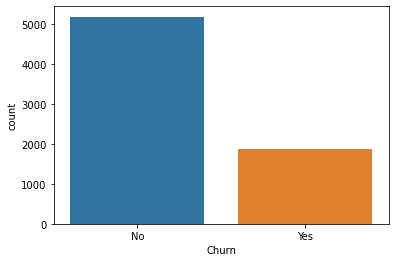

In [68]:
sns.countplot(x=given_df['Churn'])

From this data we can easily say that customers churn ratio is around 1:3 ie, from every 3 potential customers we are losing a customer. This can be increased if ignored. 

<AxesSubplot:xlabel='TotalCharges'>

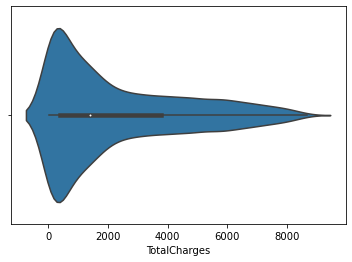

In [69]:
sns.violinplot(x=my_df['TotalCharges'],data=my_df)

From this data we can say that most of the customers take plans whose cost is ranging from 0 to 2000.

<AxesSubplot:xlabel='Churn', ylabel='Count'>

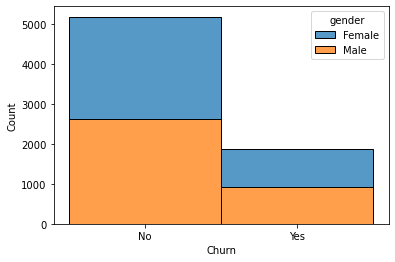

In [70]:
sns.histplot(binwidth=0.5, x=given_df['Churn'], hue=given_df['gender'], data=given_df, stat="count", multiple="stack")

From this data we can say that compared to male significant amount of females are using our services. May be we can attract new customers or stop the existing customers to churn by providing offers/discounts concerntrating on females.


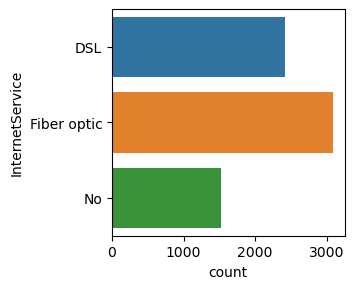

In [71]:
plt.figure(figsize=(3,3),dpi=100)
sns.countplot(data=given_df,y='InternetService')
plt.show();

Though there are less users of our internet service when compared to mobile service. we can see most of the customers use fiber optic.

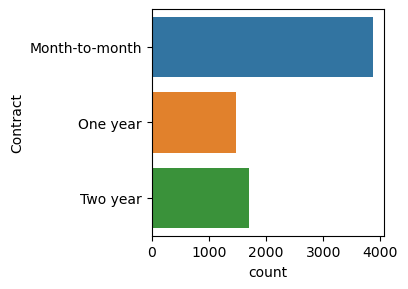

In [72]:
plt.figure(figsize=(3,3),dpi=100)
sns.countplot(data=given_df,y='Contract')
plt.show();

This data shows that cutomers took month to month subsription more when compared to one and two years.


In [73]:
#plt.figure(figsize=(3,3),dpi=100)
#sns.countplot(data=given_df,y='PaymentMethod')
#plt.show()

In [74]:
#plt.figure(figsize=(3,3),dpi=100)
#plt.pie(PMC,labels=PML)
#plt.show();

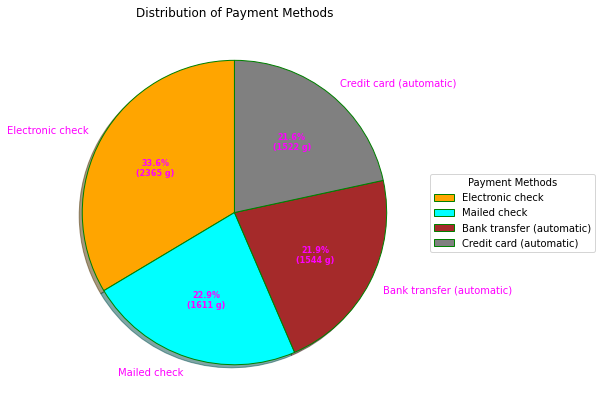

In [75]:
PMC = list(given_df.PaymentMethod.value_counts())
PML = list(given_df.PaymentMethod.unique())
colors = ( "orange", "cyan", "brown",
          "grey", "indigo", "beige")
wp = { 'linewidth' : 1, 'edgecolor' : "green" }
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(PMC,
                                  autopct = lambda pct: func(pct, PMC),
                                  labels = PML,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="magenta"))
ax.legend(wedges, PML,
          title ="Payment Methods",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))
plt.setp(autotexts, size = 8, weight ="bold")
ax.set_title("Distribution of Payment Methods")
plt.show();

From the above Pie-Chart we can say that Most of the customers prefer paying in Electronic check when compared to other methods. 

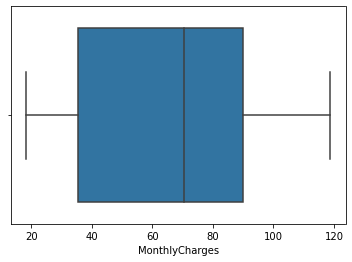

In [76]:
sns.boxplot(data=given_df,x ='MonthlyCharges')                                 # Checking for Outliers
plt.show();

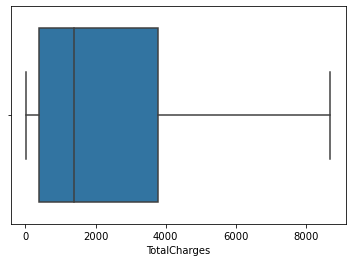

In [77]:
sns.boxplot(data=my_df,x ='TotalCharges')                                      # Checking for Outliers
plt.show();

# Data pre-processing before training our model.


## Training Our model with KNN Imputed Data

In [78]:
from sklearn.model_selection import train_test_split

In [106]:
#Spliting my Data in 75:25 ratio.
#Using Churn_yes as my output column.
X_train,X_test,Y_train,Y_test = train_test_split(my_df.drop('Churn_Yes', axis=1),given_df['Churn'],test_size=0.25,random_state=98)

In [80]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)                #Checking shapes of my splitted Data Frame 

(5282, 94) (1761, 94) (5282,) (1761,)


In [81]:
X_train.head()                                                                  #Checking my X_train DF

,gender_Male,Partner_Yes,Dependents_Yes,tenure_1,tenure_2,tenure_3,tenure_4,tenure_5,tenure_6,tenure_7,...,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,TotalCharges,SeniorCitizen,MonthlyCharges
6188,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,358.50,0.0,20.05
2164,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,6994.80,0.0,101.10
216,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,3139.80,0.0,45.25
2275,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,74.50,0.0,74.50
6839,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1129.75,0.0,100.75


In [82]:
X_test.head()                                                                   #Checking my X_test DF

,gender_Male,Partner_Yes,Dependents_Yes,tenure_1,tenure_2,tenure_3,tenure_4,tenure_5,tenure_6,tenure_7,...,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,TotalCharges,SeniorCitizen,MonthlyCharges
2507,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1816.20,0.0,24.50
1872,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,804.25,0.0,19.70
681,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,4616.05,0.0,73.80
5888,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,4783.50,0.0,95.60
3667,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,2263.45,1.0,96.55


In [83]:
Y_train.head()                                                                  #Checking my Y_train DF

6188     No
2164     No
216      No
2275    Yes
6839    Yes
Name: Churn, dtype: object

In [84]:
Y_test.head()                                                                   #Checking my Y_test DF

2507     No
1872     No
681      No
5888    Yes
3667     No
Name: Churn, dtype: object

### Standardizing my Numerical Columns in training Data.

In [85]:
X_train_obj = pd.DataFrame(X_train.drop(['MonthlyCharges','TotalCharges'], axis=1))
X_train_obj

,gender_Male,Partner_Yes,Dependents_Yes,tenure_1,tenure_2,tenure_3,tenure_4,tenure_5,tenure_6,tenure_7,...,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen
6188,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2164,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
216,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2275,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
6839,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6105,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
603,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3519,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
3252,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [86]:
from sklearn.preprocessing import StandardScaler 

In [87]:
sc = StandardScaler()

In [88]:
X_train_num = X_train[['MonthlyCharges','TotalCharges']]                       #Numerical Data Set to Standardization.
X_train_num

,MonthlyCharges,TotalCharges
6188,20.05,358.50
2164,101.10,6994.80
216,45.25,3139.80
2275,74.50,74.50
6839,100.75,1129.75
...,...,...
6105,111.25,5916.45
603,108.65,4903.20
3519,84.85,3645.60
3252,62.10,1096.65


In [89]:
X_train_num_df = pd.DataFrame(sc.fit_transform(X_train_num), index=X_train_num.index,\
             columns=X_train_num.columns)                                      # Performing Standardization to my Num_DF.

In [90]:
X_train_num_df

,MonthlyCharges,TotalCharges
6188,-1.497616,-0.853751
2164,1.197416,2.074816
216,-0.659679,0.373623
2275,0.312927,-0.979079
6839,1.185778,-0.513402
...,...,...
6105,1.534919,1.598946
603,1.448465,1.151803
3519,0.657080,0.596830
3252,-0.099391,-0.528009


In [91]:
# Combinig my catogorical and Numerical DataFrame to Train my Model.

X_train_processed = X_train_num_df.merge(X_train_obj, left_index=True, right_index=True)

In [92]:
X_train_processed

,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,tenure_1,tenure_2,tenure_3,tenure_4,tenure_5,...,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen
6188,-1.497616,-0.853751,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2164,1.197416,2.074816,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
216,-0.659679,0.373623,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2275,0.312927,-0.979079,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
6839,1.185778,-0.513402,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6105,1.534919,1.598946,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
603,1.448465,1.151803,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3519,0.657080,0.596830,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
3252,-0.099391,-0.528009,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [93]:
X_train_processed.shape                                                        # Checking the shape of our traning DF.

(5282, 94)

###  Standardization my numerical columns in Test Data


In [94]:
X_test_obj = pd.DataFrame(X_test.drop(['MonthlyCharges','TotalCharges'], axis=1))
X_test_obj

,gender_Male,Partner_Yes,Dependents_Yes,tenure_1,tenure_2,tenure_3,tenure_4,tenure_5,tenure_6,tenure_7,...,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen
2507,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
1872,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
681,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
5888,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3667,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3706,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
657,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6847,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2416,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [95]:
X_test_obj.shape                                                               # Checking my shape of X_test_obj

(1761, 92)

In [96]:
#Splitting my Numerical Data Frame from X_test to perform Standardization.

X_test_num = X_test[['MonthlyCharges','TotalCharges']]
X_test_num

,MonthlyCharges,TotalCharges
2507,24.50,1816.20
1872,19.70,804.25
681,73.80,4616.05
5888,95.60,4783.50
3667,96.55,2263.45
...,...,...
3706,84.30,2281.60
657,78.80,3597.50
6847,55.95,1082.80
2416,100.50,2673.45


In [97]:
X_test_obj.head()                                                              #Checking X_test_obj.

,gender_Male,Partner_Yes,Dependents_Yes,tenure_1,tenure_2,tenure_3,tenure_4,tenure_5,tenure_6,tenure_7,...,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen
2507,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
1872,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
681,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
5888,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3667,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0


In [98]:
X_test_num.head()                                                              #Checking X_test_num.

,MonthlyCharges,TotalCharges
2507,24.50,1816.20
1872,19.70,804.25
681,73.80,4616.05
5888,95.60,4783.50
3667,96.55,2263.45


In [99]:
#X_test_obj_oe = pd.DataFrame(oe.transform(X_test_obj), index=X_test_obj.index,\
            #columns=oe.get_feature_names(X_test_obj.columns))

In [100]:
#Performing Standarization on my Numerical Columns.

X_test_num_sc = pd.DataFrame(sc.transform(X_test_num), index=X_test_num.index,columns= X_test_num.columns)
X_test_num_sc

,MonthlyCharges,TotalCharges
2507,-1.349647,-0.210475
1872,-1.509254,-0.657044
681,0.289651,1.025085
5888,1.014533,1.098980
3667,1.046122,-0.013106
...,...,...
3706,0.638792,-0.005097
657,0.455908,0.575604
6847,-0.303888,-0.534121
2416,1.177466,0.167825


In [101]:
# Combinig my catogorical and Numerical DataFrame to Train my Model.

X_test_processed = X_test_num_sc.merge(X_test_obj, left_index=True, right_index=True)

In [102]:
X_test_processed

,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,tenure_1,tenure_2,tenure_3,tenure_4,tenure_5,...,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen
2507,-1.349647,-0.210475,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
1872,-1.509254,-0.657044,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
681,0.289651,1.025085,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
5888,1.014533,1.098980,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3667,1.046122,-0.013106,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3706,0.638792,-0.005097,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
657,0.455908,0.575604,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6847,-0.303888,-0.534121,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2416,1.177466,0.167825,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [103]:
X_test_processed.shape                                                        # Checking the shape of our testing DF.

(1761, 94)

**If your train dataframe columns numbers are matching with test dataframe you have done good so far. Now let's train our model**

## Training our model with MissForest imputed data

In [149]:
#Spliting my Data in 75:25 ratio.
#Using Churn_yes as my output column.
X_trainf,X_testf,Y_trainf,Y_testf = train_test_split(my_df_mf.drop('Churn_Yes', axis=1),given_df['Churn'],test_size=0.25,random_state=98)

In [150]:
print(X_trainf.shape, X_testf.shape, Y_trainf.shape, Y_testf.shape)                #Checking shapes of my splitted Data Frame 

(5282, 94) (1761, 94) (5282,) (1761,)


In [151]:
X_trainf.head()                                                                  #Checking my X_train DF

,gender_Male,Partner_Yes,Dependents_Yes,tenure_1,tenure_2,tenure_3,tenure_4,tenure_5,tenure_6,tenure_7,...,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,TotalCharges,SeniorCitizen,MonthlyCharges
6188,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,358.50,0.0,20.05
2164,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,6994.80,0.0,101.10
216,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,3139.80,0.0,45.25
2275,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,74.50,0.0,74.50
6839,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1129.75,0.0,100.75


In [152]:
X_testf.head()                                                                   #Checking my X_test DF

,gender_Male,Partner_Yes,Dependents_Yes,tenure_1,tenure_2,tenure_3,tenure_4,tenure_5,tenure_6,tenure_7,...,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,TotalCharges,SeniorCitizen,MonthlyCharges
2507,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1816.20,0.0,24.50
1872,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,804.25,0.0,19.70
681,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,4616.05,0.0,73.80
5888,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,4783.50,0.0,95.60
3667,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,2263.45,1.0,96.55


In [153]:
Y_trainf.head()                                                                  #Checking my Y_train DF

6188     No
2164     No
216      No
2275    Yes
6839    Yes
Name: Churn, dtype: object

In [154]:
Y_testf.head()                                                                   #Checking my Y_test DF

2507     No
1872     No
681      No
5888    Yes
3667     No
Name: Churn, dtype: object

### Standardizing my Numerical Columns in training Data.

In [155]:
X_trainf_obj = pd.DataFrame(X_trainf.drop(['MonthlyCharges','TotalCharges'], axis=1))
X_trainf_obj

,gender_Male,Partner_Yes,Dependents_Yes,tenure_1,tenure_2,tenure_3,tenure_4,tenure_5,tenure_6,tenure_7,...,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen
6188,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2164,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
216,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2275,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
6839,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6105,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
603,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3519,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
3252,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [156]:
from sklearn.preprocessing import StandardScaler 

In [157]:
sc = StandardScaler()

In [158]:
X_trainf_num = X_trainf[['MonthlyCharges','TotalCharges']]                       #Numerical Data Set to Standardization.
X_trainf_num

,MonthlyCharges,TotalCharges
6188,20.05,358.50
2164,101.10,6994.80
216,45.25,3139.80
2275,74.50,74.50
6839,100.75,1129.75
...,...,...
6105,111.25,5916.45
603,108.65,4903.20
3519,84.85,3645.60
3252,62.10,1096.65


In [159]:
X_trainf_num_df = pd.DataFrame(sc.fit_transform(X_trainf_num), index=X_trainf_num.index,\
             columns=X_trainf_num.columns)                                      # Performing Standardization to my Num_DF.

In [160]:
X_trainf_num_df

,MonthlyCharges,TotalCharges
6188,-1.497616,-0.853859
2164,1.197416,2.074526
216,-0.659679,0.373439
2275,0.312927,-0.979179
6839,1.185778,-0.513531
...,...,...
6105,1.534919,1.598685
603,1.448465,1.151571
3519,0.657080,0.596632
3252,-0.099391,-0.528137


In [161]:
# Combinig my catogorical and Numerical DataFrame to Train my Model.

X_trainf_processed = X_trainf_num_df.merge(X_trainf_obj, left_index=True, right_index=True)

In [162]:
X_trainf_processed

,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,tenure_1,tenure_2,tenure_3,tenure_4,tenure_5,...,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen
6188,-1.497616,-0.853859,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2164,1.197416,2.074526,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
216,-0.659679,0.373439,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2275,0.312927,-0.979179,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
6839,1.185778,-0.513531,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6105,1.534919,1.598685,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
603,1.448465,1.151571,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3519,0.657080,0.596632,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
3252,-0.099391,-0.528137,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [163]:
X_trainf_processed.shape                                                        # Checking the shape of our traning DF.

(5282, 94)

###  Standardization my numerical columns in Test Data


In [164]:
X_testf_obj = pd.DataFrame(X_testf.drop(['MonthlyCharges','TotalCharges'], axis=1))
X_testf_obj

,gender_Male,Partner_Yes,Dependents_Yes,tenure_1,tenure_2,tenure_3,tenure_4,tenure_5,tenure_6,tenure_7,...,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen
2507,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
1872,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
681,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
5888,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3667,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3706,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
657,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6847,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2416,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [165]:
X_testf_obj.shape                                                               # Checking my shape of X_test_obj

(1761, 92)

In [166]:
#Splitting my Numerical Data Frame from X_test to perform Standardization.

X_testf_num = X_testf[['MonthlyCharges','TotalCharges']]
X_testf_num

,MonthlyCharges,TotalCharges
2507,24.50,1816.20
1872,19.70,804.25
681,73.80,4616.05
5888,95.60,4783.50
3667,96.55,2263.45
...,...,...
3706,84.30,2281.60
657,78.80,3597.50
6847,55.95,1082.80
2416,100.50,2673.45


In [167]:
X_testf_obj.head()                                                              #Checking X_test_obj.

,gender_Male,Partner_Yes,Dependents_Yes,tenure_1,tenure_2,tenure_3,tenure_4,tenure_5,tenure_6,tenure_7,...,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen
2507,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
1872,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
681,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
5888,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3667,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0


In [169]:
X_testf_num.head()                                                              #Checking X_test_num.

,MonthlyCharges,TotalCharges
2507,24.50,1816.20
1872,19.70,804.25
681,73.80,4616.05
5888,95.60,4783.50
3667,96.55,2263.45


In [99]:
#X_test_obj_oe = pd.DataFrame(oe.transform(X_test_obj), index=X_test_obj.index,\
            #columns=oe.get_feature_names(X_test_obj.columns))

In [170]:
#Performing Standarization on my Numerical Columns.

X_testf_num_sc = pd.DataFrame(sc.transform(X_testf_num), index=X_testf_num.index,columns= X_testf_num.columns)
X_testf_num_sc

,MonthlyCharges,TotalCharges
2507,-1.349647,-0.210623
1872,-1.509254,-0.657164
681,0.289651,1.024861
5888,1.014533,1.098751
3667,1.046122,-0.013266
...,...,...
3706,0.638792,-0.005257
657,0.455908,0.575407
6847,-0.303888,-0.534249
2416,1.177466,0.167654


In [126]:
# Combinig my catogorical and Numerical DataFrame to Train my Model.

X_testf_processed = X_testf_num_sc.merge(X_testf_obj, left_index=True, right_index=True)

In [127]:
X_testf_processed

,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,tenure_1,tenure_2,tenure_3,tenure_4,tenure_5,...,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen
2507,-1.349647,-0.210623,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
1872,-1.509254,-0.657164,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
681,0.289651,1.024861,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
5888,1.014533,1.098751,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3667,1.046122,-0.013266,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3706,0.638792,-0.005257,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
657,0.455908,0.575407,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6847,-0.303888,-0.534249,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2416,1.177466,0.167654,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [128]:
X_testf_processed.shape                                                        # Checking the shape of our testing DF.

(1761, 94)

# Training my Model using different Algorithms

In [129]:
# Importing all our required Algorithms.

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


In [130]:
# Assigning variables to our methods

lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
knn = KNeighborsClassifier()
gnb = GaussianNB()
svc = SVC()

## Training Model using KNN Imputed Values

In [131]:
# Training or model using different Algorithm methods

lr.fit(X_train_processed, Y_train)
dt.fit(X_train_processed, Y_train)
rf.fit(X_train_processed, Y_train)
knn.fit(X_train_processed, Y_train)
gnb.fit(X_train_processed, Y_train)
svc.fit(X_train_processed, Y_train)

C:\Users\K.V.N\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

DecisionTreeClassifier()

RandomForestClassifier()

KNeighborsClassifier()

GaussianNB()

SVC()

### Predicting our Output

In [132]:
y_pred_lr = lr.predict(X_test_processed)
y_pred_dt = dt.predict(X_test_processed)
y_pred_rf = rf.predict(X_test_processed)
y_pred_knn = knn.predict(X_test_processed)
y_pred_gnb = gnb.predict(X_test_processed)
y_pred_svc = svc.predict(X_test_processed)

In [133]:
y_pred_lr
y_pred_dt
y_pred_rf
y_pred_knn
y_pred_gnb
y_pred_svc

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

array(['No', 'No', 'No', ..., 'No', 'No', 'Yes'], dtype=object)

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

array(['No', 'No', 'No', ..., 'No', 'Yes', 'Yes'], dtype=object)

array(['No', 'No', 'No', ..., 'Yes', 'Yes', 'No'], dtype='<U3')

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

## Training Model Using MissForest imputed values

In [134]:
# Training or model using different Algorithm methods

lr.fit(X_trainf_processed, Y_trainf)
dt.fit(X_trainf_processed, Y_trainf)
rf.fit(X_trainf_processed, Y_trainf)
knn.fit(X_trainf_processed, Y_trainf)
gnb.fit(X_trainf_processed, Y_trainf)
svc.fit(X_trainf_processed, Y_trainf)

C:\Users\K.V.N\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

DecisionTreeClassifier()

RandomForestClassifier()

KNeighborsClassifier()

GaussianNB()

SVC()

In [135]:
y_predf_lr = lr.predict(X_testf_processed)
y_predf_dt = dt.predict(X_testf_processed)
y_predf_rf = rf.predict(X_testf_processed)
y_predf_knn = knn.predict(X_testf_processed)
y_predf_gnb = gnb.predict(X_testf_processed)
y_predf_svc = svc.predict(X_testf_processed)

In [136]:
y_predf_lr
y_predf_dt
y_predf_rf
y_predf_knn
y_predf_gnb
y_predf_svc

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

array(['No', 'No', 'No', ..., 'No', 'No', 'Yes'], dtype=object)

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

array(['No', 'No', 'No', ..., 'No', 'Yes', 'Yes'], dtype=object)

array(['No', 'No', 'No', ..., 'Yes', 'Yes', 'No'], dtype='<U3')

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

# Evaluation Metrics

In [137]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [138]:
def metric_cal(real_test, pred_test):
    acc = accuracy_score(real_test, pred_test)
    precision = precision_score(real_test, pred_test, average='weighted')
    recall = recall_score(real_test, pred_test, average='weighted')
    cm = pd.crosstab(real_test, pred_test, rownames=['Real'], colnames=['Predicted'])
    f1score = f1_score(real_test, pred_test, average='weighted')
    return{'Accuracy':acc,
            'Precision':precision,
            'Recall':recall,
            'f1score':f1score,
            'Confusion Matrix':cm}
    

a = metric_cal(y_pred_lr, Y_test.values.flatten())
b = metric_cal(y_pred_dt, Y_test.values.flatten())
c = metric_cal(y_pred_rf, Y_test.values.flatten())
for i in c:
    print(i,c[i])
print('The performance of the KNN Algorithm is:')
d = metric_cal(y_pred_knn, Y_test.values.flatten())
for i in d:
    print(i,d[i])
print('The performance of the Gaussian Naive Bayes Algorithm is:')
e = metric_cal(y_pred_gnb, Y_test.values.flatten())
for i in e:
    print(i,e[i])
print('The performance of the Support Vector Machines Algorithm is:')
f = metric_cal(y_pred_svc, Y_test.values.flatten())
for i in f:
    print(i,f[i])

## Evaluating Model with KNN imputed Values

In [139]:
acc_dict = {'Logistic Regresion' : metric_cal(y_pred_lr, Y_test.values.flatten())['Accuracy'],
            'Decision Tree' : metric_cal(y_pred_dt, Y_test.values.flatten())['Accuracy'],
            'Random Forest' : metric_cal(y_pred_rf, Y_test.values.flatten())['Accuracy'],
            'KNN Algorith' : metric_cal(y_pred_knn, Y_test.values.flatten())['Accuracy'],
            'Gaussian NB' : metric_cal(y_pred_gnb, Y_test.values.flatten())['Accuracy'],
            'SVM' : metric_cal(y_pred_svc, Y_test.values.flatten())['Accuracy'],
           }

In [140]:
pre_dict = {'Logistic Regresion' : metric_cal(y_pred_lr, Y_test.values.flatten())['Precision'],
            'Decision Tree' : metric_cal(y_pred_dt, Y_test.values.flatten())['Precision'],
            'Random Forest' : metric_cal(y_pred_rf, Y_test.values.flatten())['Precision'],
            'KNN Algorith' : metric_cal(y_pred_knn, Y_test.values.flatten())['Precision'],
            'Gaussian NB' : metric_cal(y_pred_gnb, Y_test.values.flatten())['Precision'],
            'SVM' : metric_cal(y_pred_svc, Y_test.values.flatten())['Precision'],
           }

In [141]:
recal_dict = {'Logistic Regresion' : metric_cal(y_pred_lr, Y_test.values.flatten())['Recall'],
            'Decision Tree' : metric_cal(y_pred_dt, Y_test.values.flatten())['Recall'],
            'Random Forest' : metric_cal(y_pred_rf, Y_test.values.flatten())['Recall'],
            'KNN Algorith' : metric_cal(y_pred_knn, Y_test.values.flatten())['Recall'],
            'Gaussian NB' : metric_cal(y_pred_gnb, Y_test.values.flatten())['Recall'],
            'SVM' : metric_cal(y_pred_svc, Y_test.values.flatten())['Recall'],
           }

In [142]:
f1_dict = {'Logistic Regresion' : metric_cal(y_pred_lr, Y_test.values.flatten())['f1score'],
            'Decision Tree' : metric_cal(y_pred_dt, Y_test.values.flatten())['f1score'],
            'Random Forest' : metric_cal(y_pred_rf, Y_test.values.flatten())['f1score'],
            'KNN Algorith' : metric_cal(y_pred_knn, Y_test.values.flatten())['f1score'],
            'Gaussian NB' : metric_cal(y_pred_gnb, Y_test.values.flatten())['f1score'],
            'SVM' : metric_cal(y_pred_svc, Y_test.values.flatten())['f1score'],
           }

In [144]:
op_df_knn =pd.DataFrame.from_dict([acc_dict,pre_dict,recal_dict,f1_dict])
op_df_knn=op_df_knn.rename(index={0:'Accuracy',1:'Precision',2:'Recall',3:'F1-Score'})
op_df_knn = pd.DataFrame.transpose(op_df_knn)
op_df_knn

,Accuracy,Precision,Recall,F1-Score
Logistic Regresion,0.809199,0.821316,0.809199,0.814232
Decision Tree,0.755253,0.751607,0.755253,0.753316
Random Forest,0.804656,0.837805,0.804656,0.816960
KNN Algorith,0.771721,0.769385,0.771721,0.770500
Gaussian NB,0.651902,0.704172,0.651902,0.627624
SVM,0.811471,0.835625,0.811471,0.820641


#plt.figure(figsize=(10,3),dpi=100)
#plt.bar(Algo, acc,width = 0.4, color = ['r','g','b', 'c','grey','y'])
#plt.xlabel('Algorithms', fontsize=16)
#plt.ylabel('Accuracy', fontsize=16)
#plt.title('Altgorithms vs Accuracy',fontsize=20)
#plt.show();    

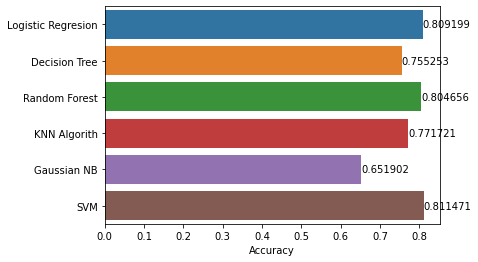

In [146]:
#Algo =list(acc_dict.keys())
#acc = list(acc_dict.values())
#acc = [i * 100 for i in acc]
ax = sns.barplot(x=op_df_knn['Accuracy'],y=op_df_knn.index)
for i in ax.containers:
    ax.bar_label(i,)
plt.show();

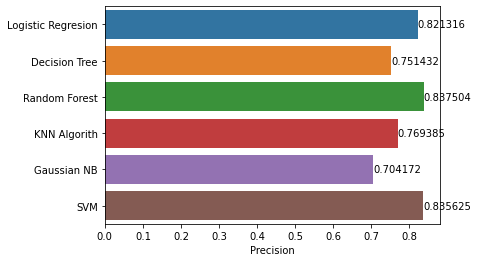

In [141]:
ax = sns.barplot(x=op_df['Precision'],y=op_df.index)
for i in ax.containers:
    ax.bar_label(i,)
plt.show();

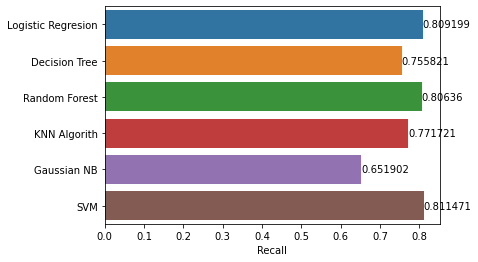

In [142]:
ax = sns.barplot(x=op_df['Recall'],y=op_df.index)
for i in ax.containers:
    ax.bar_label(i,)
plt.show();

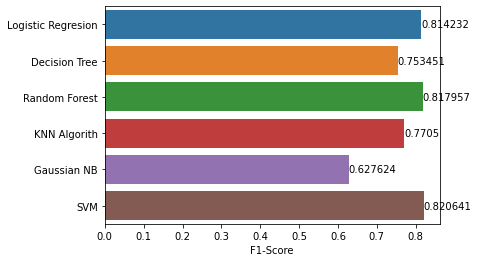

In [143]:
ax = sns.barplot(x=op_df['F1-Score'],y=op_df.index)
for i in ax.containers:
    ax.bar_label(i,)
plt.show();

## Evaluating Model with MissForest Imputed Values

In [148]:
acc_dictf = {'Logistic Regresion' : metric_cal(y_predf_lr, Y_testf.values.flatten())['Accuracy'],
            'Decision Tree' : metric_cal(y_predf_dt, Y_testf.values.flatten())['Accuracy'],
            'Random Forest' : metric_cal(y_predf_rf, Y_testf.values.flatten())['Accuracy'],
            'KNN Algorith' : metric_cal(y_predf_knn, Y_testf.values.flatten())['Accuracy'],
            'Gaussian NB' : metric_cal(y_predf_gnb, Y_testf.values.flatten())['Accuracy'],
            'SVM' : metric_cal(y_predf_svc, Y_testf.values.flatten())['Accuracy'],
           }
acc_dictf
acc_dict

{'Logistic Regresion': 0.8091993185689949,
 'Decision Tree': 0.7546848381601363,
 'Random Forest': 0.8012492901760363,
 'KNN Algorith': 0.7717206132879046,
 'Gaussian NB': 0.6519023282226007,
 'SVM': 0.8114707552526973}

{'Logistic Regresion': 0.8091993185689949,
 'Decision Tree': 0.7552526973310619,
 'Random Forest': 0.80465644520159,
 'KNN Algorith': 0.7717206132879046,
 'Gaussian NB': 0.6519023282226007,
 'SVM': 0.8114707552526973}

In [140]:
pre_dict = {'Logistic Regresion' : metric_cal(y_pred_lr, Y_test.values.flatten())['Precision'],
            'Decision Tree' : metric_cal(y_pred_dt, Y_test.values.flatten())['Precision'],
            'Random Forest' : metric_cal(y_pred_rf, Y_test.values.flatten())['Precision'],
            'KNN Algorith' : metric_cal(y_pred_knn, Y_test.values.flatten())['Precision'],
            'Gaussian NB' : metric_cal(y_pred_gnb, Y_test.values.flatten())['Precision'],
            'SVM' : metric_cal(y_pred_svc, Y_test.values.flatten())['Precision'],
           }

In [141]:
recal_dict = {'Logistic Regresion' : metric_cal(y_pred_lr, Y_test.values.flatten())['Recall'],
            'Decision Tree' : metric_cal(y_pred_dt, Y_test.values.flatten())['Recall'],
            'Random Forest' : metric_cal(y_pred_rf, Y_test.values.flatten())['Recall'],
            'KNN Algorith' : metric_cal(y_pred_knn, Y_test.values.flatten())['Recall'],
            'Gaussian NB' : metric_cal(y_pred_gnb, Y_test.values.flatten())['Recall'],
            'SVM' : metric_cal(y_pred_svc, Y_test.values.flatten())['Recall'],
           }

In [142]:
f1_dict = {'Logistic Regresion' : metric_cal(y_pred_lr, Y_test.values.flatten())['f1score'],
            'Decision Tree' : metric_cal(y_pred_dt, Y_test.values.flatten())['f1score'],
            'Random Forest' : metric_cal(y_pred_rf, Y_test.values.flatten())['f1score'],
            'KNN Algorith' : metric_cal(y_pred_knn, Y_test.values.flatten())['f1score'],
            'Gaussian NB' : metric_cal(y_pred_gnb, Y_test.values.flatten())['f1score'],
            'SVM' : metric_cal(y_pred_svc, Y_test.values.flatten())['f1score'],
           }

In [144]:
op_df_knn =pd.DataFrame.from_dict([acc_dict,pre_dict,recal_dict,f1_dict])
op_df_knn=op_df_knn.rename(index={0:'Accuracy',1:'Precision',2:'Recall',3:'F1-Score'})
op_df_knn = pd.DataFrame.transpose(op_df_knn)
op_df_knn

,Accuracy,Precision,Recall,F1-Score
Logistic Regresion,0.809199,0.821316,0.809199,0.814232
Decision Tree,0.755253,0.751607,0.755253,0.753316
Random Forest,0.804656,0.837805,0.804656,0.816960
KNN Algorith,0.771721,0.769385,0.771721,0.770500
Gaussian NB,0.651902,0.704172,0.651902,0.627624
SVM,0.811471,0.835625,0.811471,0.820641


#plt.figure(figsize=(10,3),dpi=100)
#plt.bar(Algo, acc,width = 0.4, color = ['r','g','b', 'c','grey','y'])
#plt.xlabel('Algorithms', fontsize=16)
#plt.ylabel('Accuracy', fontsize=16)
#plt.title('Altgorithms vs Accuracy',fontsize=20)
#plt.show();    

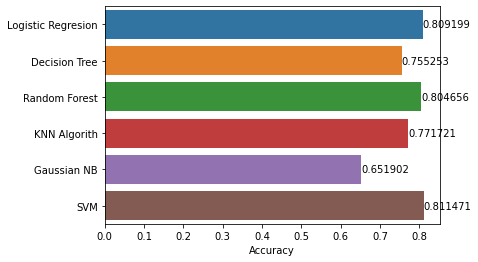

In [146]:
#Algo =list(acc_dict.keys())
#acc = list(acc_dict.values())
#acc = [i * 100 for i in acc]
ax = sns.barplot(x=op_df_knn['Accuracy'],y=op_df_knn.index)
for i in ax.containers:
    ax.bar_label(i,)
plt.show();

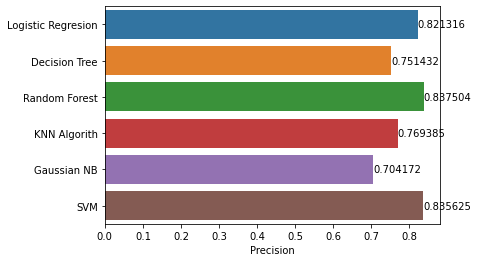

In [141]:
ax = sns.barplot(x=op_df['Precision'],y=op_df.index)
for i in ax.containers:
    ax.bar_label(i,)
plt.show();

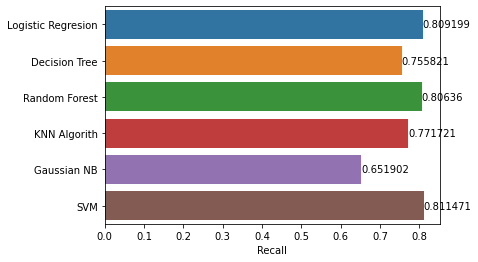

In [142]:
ax = sns.barplot(x=op_df['Recall'],y=op_df.index)
for i in ax.containers:
    ax.bar_label(i,)
plt.show();

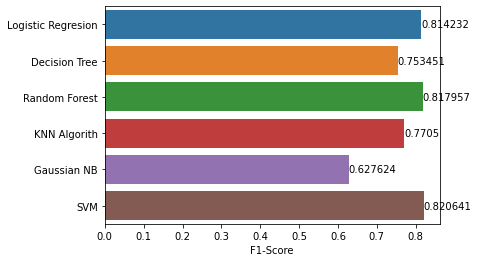

In [143]:
ax = sns.barplot(x=op_df['F1-Score'],y=op_df.index)
for i in ax.containers:
    ax.bar_label(i,)
plt.show();

# Conclusion


In [91]:
Sample_df = pd.DataFrame(columns=['gender', 'SeniorCitizen', 'Partner', 'Dependents','tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'])

In [92]:
y_pred_lr

array(['Yes', 'No', 'No', ..., 'Yes', 'No', 'No'], dtype=object)

In [93]:
Sample_df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
